In [1]:
from main.manipulate_data import Augmenter
from main.helpers import Helper
from main.constants import DATA_PROCESSED, NOISE_PROCESSED, SAMPLE_RATE
import matplotlib.pyplot as plt
import librosa.display
import librosa as lr
import numpy as np

In [2]:
# Laden der vorverarbeiteten Rausch- und Audioaufnahmen
noise_numpy = Helper(NOISE_PROCESSED).get_numpy_data()
audio_numpy = Helper(DATA_PROCESSED).get_numpy_data()

print("Rauschen:",noise_numpy.shape)
print("Audio:",audio_numpy.shape)


Rauschen: (100, 80000)
Audio: (72, 80000)


In [3]:
# Erstellen des Tensors
input_data = Augmenter(audio_numpy,noise_numpy).get_noise_input()
print("Tensor:", input_data.shape)

Tensor: (7200, 1025, 157)


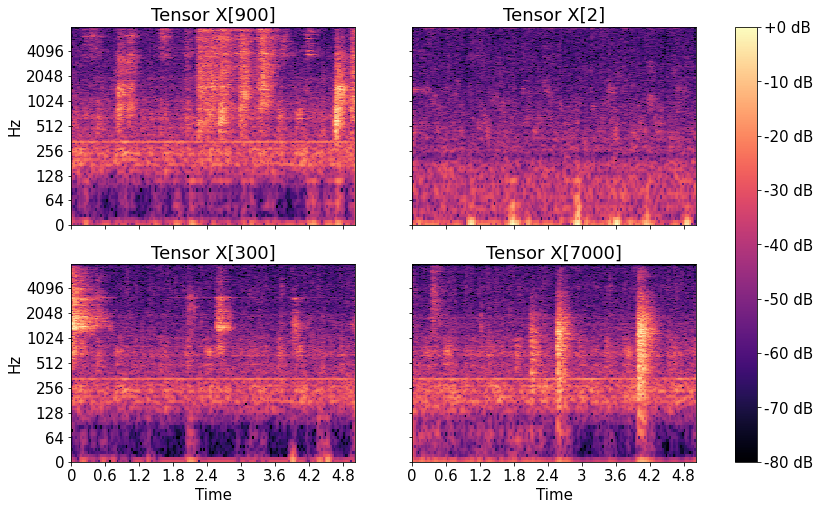

In [4]:
# Just a plot can be ignored
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(14,8))

D_w = lr.amplitude_to_db(input_data[900], ref=np.max)
img = lr.display.specshow(D_w,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[0,0])
plt.sca(ax[0,0])
plt.yticks(size=15)
plt.xticks(size=15)
ax[0,0].set_xlabel(None)
ax[0,0].set_xticklabels([])
plt.ylabel("Hz",size=15)
plt.title("Tensor X[900]",size=18)

D_a = lr.amplitude_to_db(input_data[7], ref=np.max)
img_3 = lr.display.specshow(D_a,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[0,1])
plt.sca(ax[0,1])
plt.xticks(size=15)
ax[0,1].set_xticklabels([])
ax[0,1].set_xlabel(None)
ax[0,1].set_yticklabels([])
ax[0,1].set_ylabel(None)
plt.title("Tensor X[2]",size=18)

D_a = lr.amplitude_to_db(input_data[300], ref=np.max)
img_3 = lr.display.specshow(D_a,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[1,0])
plt.sca(ax[1,0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
plt.title("Tensor X[300]",size=18)

D_w = lr.amplitude_to_db(input_data[7001], ref=np.max)
img = lr.display.specshow(D_w,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[1,1])
plt.sca(ax[1,1])
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
ax[1,1].set_ylabel(None)
ax[1,1].set_yticklabels([])
plt.title("Tensor X[7000]",size=18)

# fancy colorbar
cb = fig.colorbar(img,ax=ax,format="%+2.f dB")
for t in cb.ax.get_yticklabels():
    t.set_fontsize(15)
#plt.savefig("tensor.pdf",dpi=300,bbox_inches="tight",transparent=True)